In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
from sklearn import linear_model
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# read in Dataset
df = pd.read_csv('../data-101/offenses_new_york_city_2013.csv')
df.columns = ['City', 'Population', 'Violent_crime', 'Murder', 'Rape', 'Rape2', 'Robbery', 'Agg_assault', 
              'Property_crime', 'Burglary', 'Larceny_theft', 'MV_theft', 'Arson3']

In [4]:
print(df[df.Population > 300000])

         City  Population  Violent_crime  Murder  Rape  Rape2  Robbery  \
216  New York     8396126          52384     335   NaN   1112    19170   

     Agg_assault  Property_crime  Burglary  Larceny_theft  MV_theft  Arson3  
216        31767          141971     16606         117931      7434     NaN  


In [5]:
# clean Dataset
df_clean = pd.DataFrame()
df_clean = df.drop(['Rape', 'Arson3'], axis=1)
df_clean = df_clean.drop([216], axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


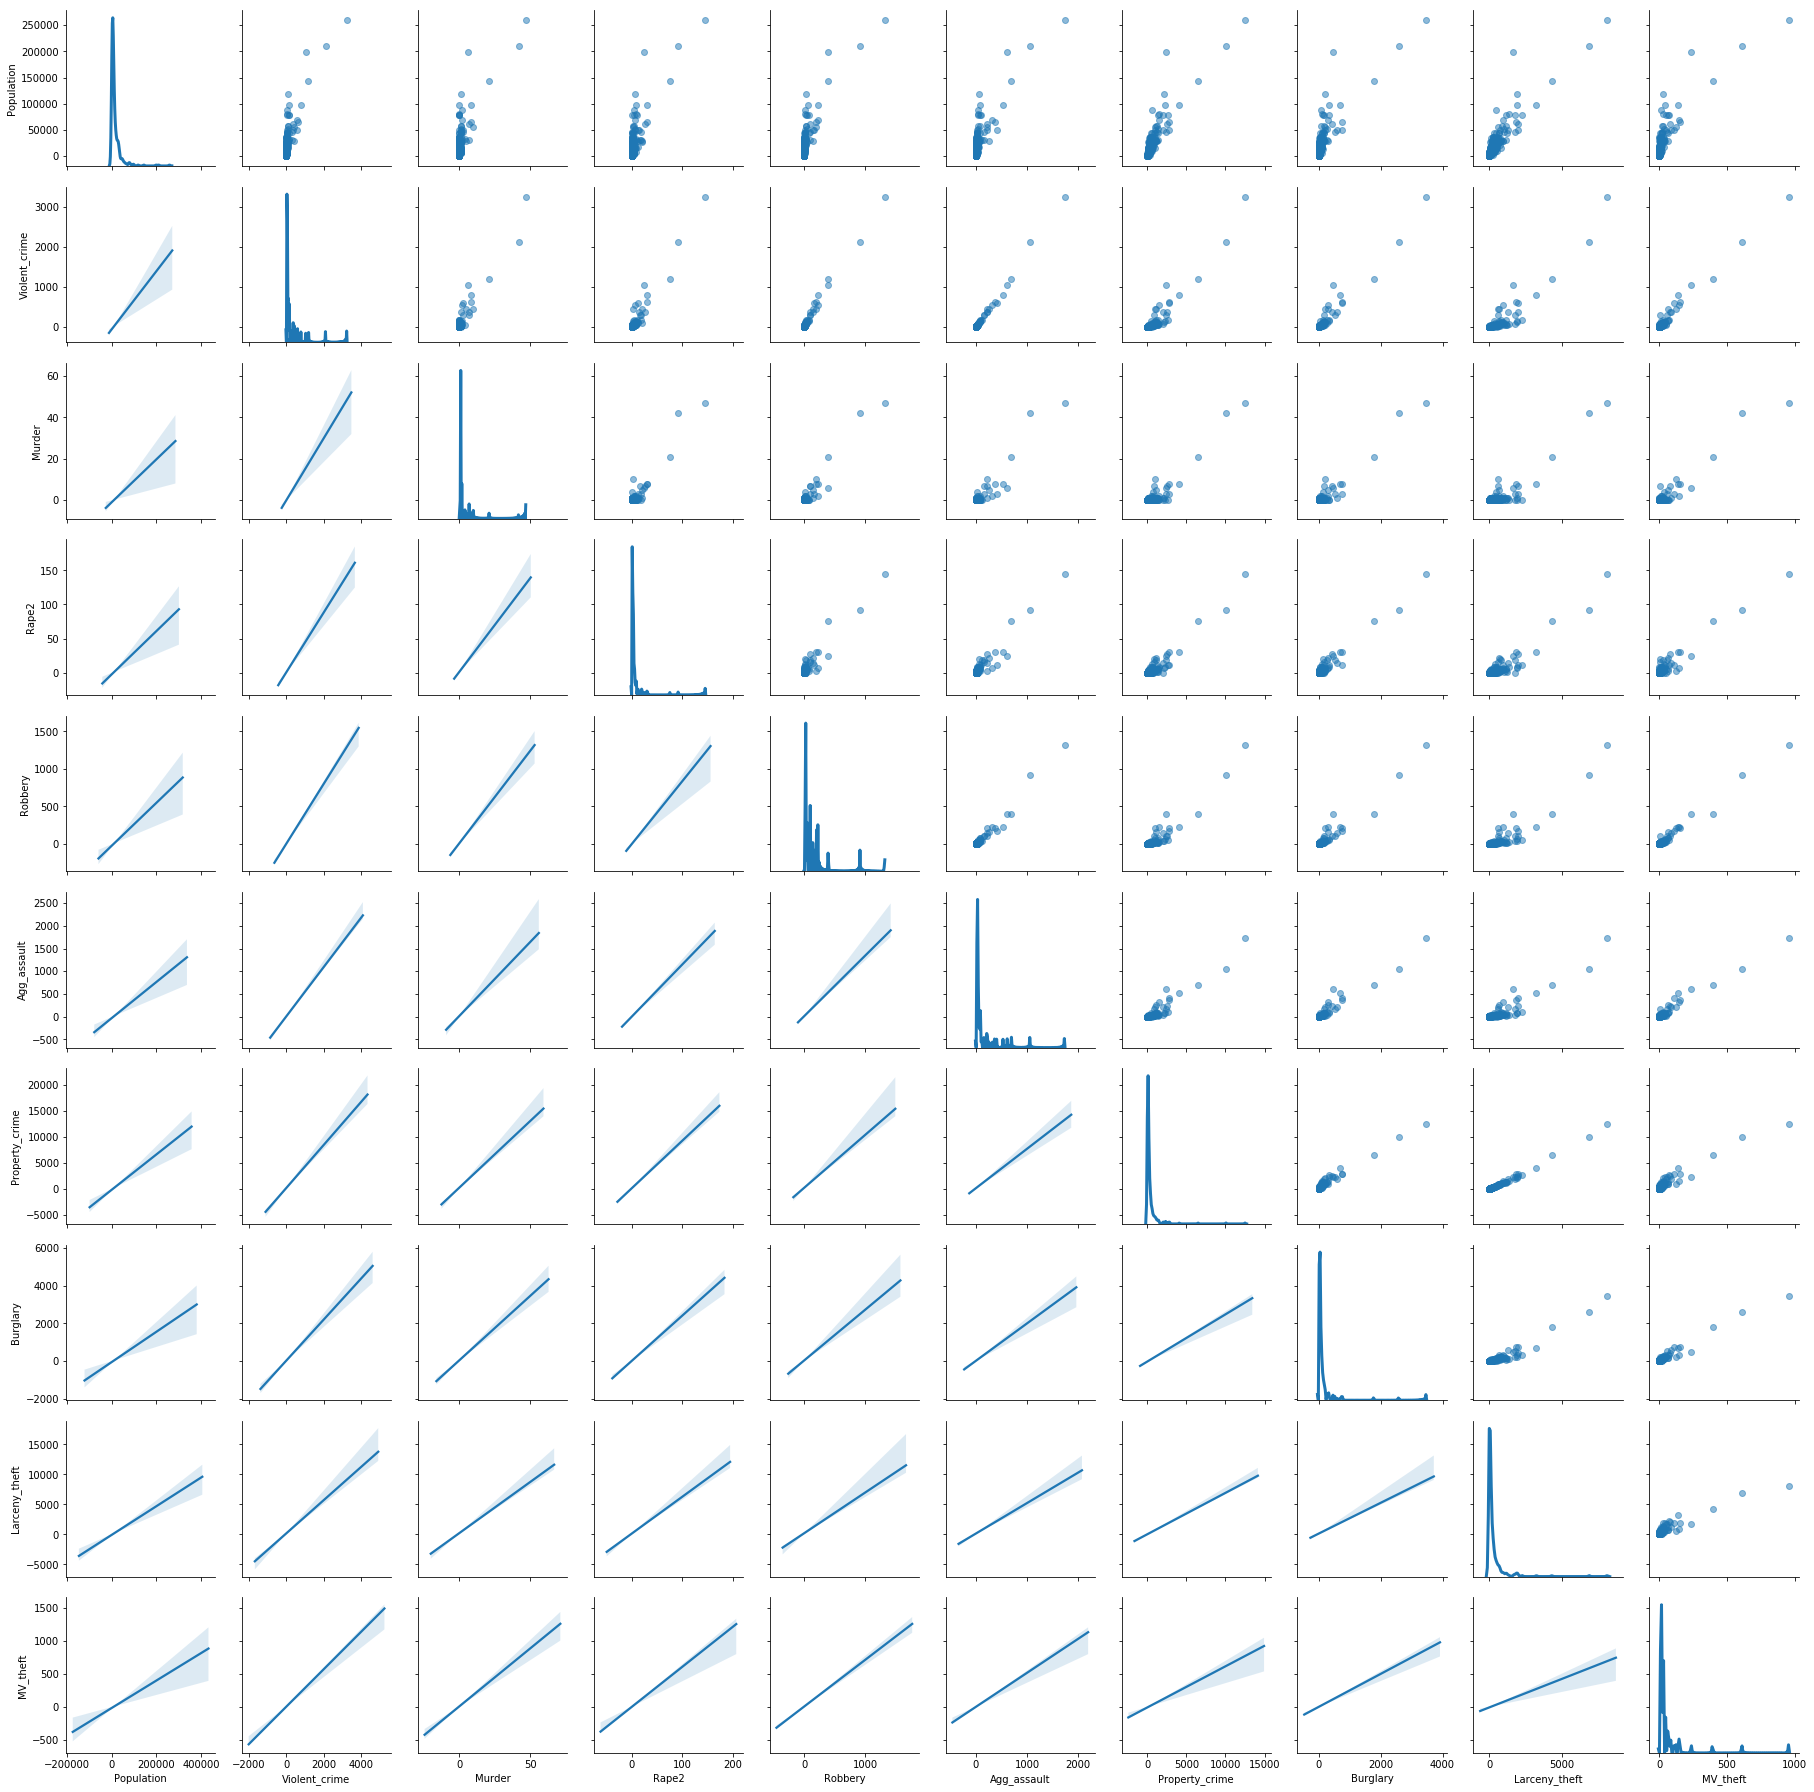

In [6]:
# scan data with univariate & bivariate methods
graph = sns.PairGrid(df_clean, diag_sharey=False)
graph.map_upper(plt.scatter, alpha=0.5)
graph.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
graph.map_diag(sns.kdeplot, lw=3)
plt.show()

In [7]:
df_clean.head()

,City,Population,Violent_crime,Murder,Rape2,Robbery,Agg_assault,Property_crime,Burglary,Larceny_theft,MV_theft
0,Adams Village,1861,0,0,0,0,0,12,2,10,0
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1
2,Akron Village,2846,3,0,0,0,3,16,1,15,0
3,Albany,97956,791,8,30,227,526,4090,705,3243,142
4,Albion Village,6388,23,0,3,4,16,223,53,165,5


In [8]:
# construct data for fitting
x = pd.DataFrame()
y = pd.DataFrame()
x['Population'] = df_clean['Population']
x['Population2'] = [x*x for x in x['Population'].tolist()]
x['Violent_crime'] = df_clean['Violent_crime']
x['Murder'] = df_clean['Murder'].apply(lambda x: 1 if x > 0 else 0)
x['Rape2'] = df_clean['Rape2'].apply(lambda x: 1 if x > 0 else 0)
x['Robbery'] = df_clean['Robbery'].apply(lambda x: 1 if x > 0 else 0)
x['Agg_assault'] = df_clean['Agg_assault']
x['Burglary'] = df_clean['Burglary']
x['Larceny_theft'] = df_clean['Larceny_theft']
x['MV_theft'] = df_clean['MV_theft'].apply(lambda x: 1 if x > 0 else 0)

y['Property_crime'] = df_clean['Property_crime']

In [9]:
model = linear_model.LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
print('The fitted coefficiency = {}'.format(model.coef_))
print('The fitted intercept = {}'.format(model.intercept_))
print(model.score(x, y))

The fitted coefficiency = [[ 1.00586286e-04  1.25263543e-09  3.71783515e-01 -4.72547865e+00
  -1.12362277e+00 -4.88039429e-01 -3.76692701e-01  1.09250214e+00
   9.93732146e-01  2.17471364e+00]]
The fitted intercept = [-0.95519098]
0.999947616343237


In [11]:
pred_y = model.predict(x)

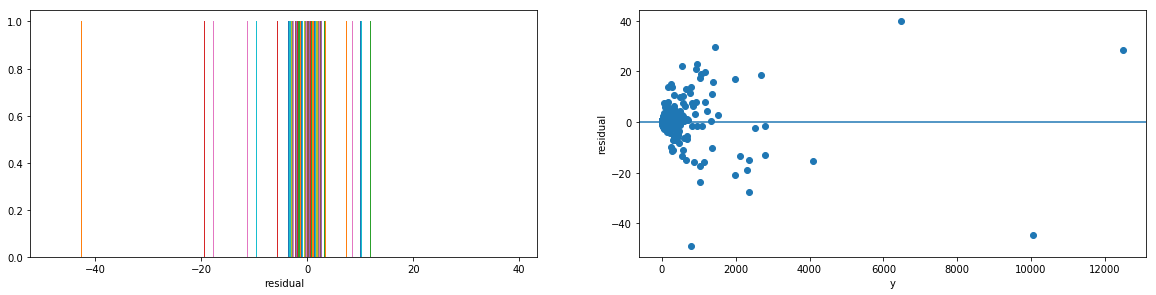

In [12]:
# validate linear model by looking at residual
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
plt.hist((y - pred_y))
plt.xlabel('residual')

plt.subplot(2,2,2)
plt.scatter(y, (y - pred_y))
plt.xlabel('y')
plt.ylabel('residual')
plt.axhline(y=0)
plt.show()

## from right plot, it looks ok. The residual is evenly distributed around zero

##  multicollinearity
##           In this case, two features, Population & Population2 are strongly collerated.
>


## Use 2014 Dataset to cross-validate the above model

In [13]:
# read in holdout dataset
df_2014 = pd.read_csv('../data-101/offenses_new_york_city_2014.csv')
df_2014.columns = ['City', 'Population', 'Violent_crime', 'Murder', 'Rape2', 'Rape', 'Robbery', 'Agg_assault', 
              'Property_crime', 'Burglary', 'Larceny_theft', 'MV_theft', 'Arson3']

In [14]:
print(df_2014[df_2014.Population > 300000])

          City  Population  Violent_crime  Murder  Rape2  Rape  Robbery  \
227  New York4     8473938          50564     333   2190   NaN    16581   

     Agg_assault  Property_crime  Burglary  Larceny_theft  MV_theft  Arson3  
227        31460        135747.0     15916       112107.0      7724     NaN  


In [15]:
# clean Dataset
df_2014_clean = pd.DataFrame()
df_2014_clean = df_2014.drop(['Rape', 'Arson3'], axis=1)
df_2014_clean = df_2014_clean.drop([227], axis=0)
df_2014_clean.fillna(value=0, inplace=True)

In [16]:
df_2014_clean.head()

,City,Population,Violent_crime,Murder,Rape2,Robbery,Agg_assault,Property_crime,Burglary,Larceny_theft,MV_theft
0,Adams Village,1851,0,0,0,0,0,11.0,1,10.0,0
1,Addison Town and Village,2568,2,0,0,1,1,49.0,1,47.0,1
2,Afton Village4,820,0,0,0,0,0,1.0,0,1.0,0
3,Akron Village,2842,1,0,0,0,1,17.0,0,17.0,0
4,Albany4,98595,802,8,54,237,503,3888.0,683,3083.0,122


In [17]:
# construct holdout data for testing
x_2014 = pd.DataFrame()
y_2014 = pd.DataFrame()
x_2014['Population'] = df_2014_clean['Population']
x_2014['Population2'] = [x*x for x in x_2014['Population'].tolist()]
x_2014['Violent_crime'] = df_2014_clean['Violent_crime']
x_2014['Murder'] = df_2014_clean['Murder'].apply(lambda x: 1 if x > 0 else 0)
x_2014['Rape2'] = df_2014_clean['Rape2'].apply(lambda x: 1 if x > 0 else 0)
x_2014['Robbery'] = df_2014_clean['Robbery'].apply(lambda x: 1 if x > 0 else 0)
x_2014['Agg_assault'] = df_2014_clean['Agg_assault']
x_2014['Burglary'] = df_2014_clean['Burglary']
x_2014['Larceny_theft'] = df_2014_clean['Larceny_theft']
x_2014['MV_theft'] = df_2014_clean['MV_theft'].apply(lambda x: 1 if x > 0 else 0)

y_2014['Property_crime'] = df_2014_clean['Property_crime']

In [19]:
pred_y_2014 = model.predict(x_2014)
print('The holdout datasets Rsquared = {}'.format(model.score(x_2014, y_2014)))
print('The original datasets Rsquared = {}'.format(model.score(x, y)))

The holdout datasets Rsquared = 0.9998858857532189
The original datasets Rsquared = 0.999947616343237


##  So R^2 are consistent for training dataset and cross-validation dataset.

In [20]:
# test for holdout
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [21]:
modelLR = linear_model.LinearRegression()
modelLR.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
print('The fitted coefficiency = {}'.format(modelLR.coef_))
print('The fitted intercept = {}'.format(modelLR.intercept_))
print('The training dataset RSquared = {}'.format(modelLR.score(X_train, Y_train)))
print('The test dataset RSquared = {}'.format(modelLR.score(X_test, Y_test)))

The fitted coefficiency = [[ 8.45373956e-05  1.18270648e-09  3.68113313e-01 -1.70312163e+00
  -1.40233338e+00 -8.53209348e-02 -3.60238125e-01  1.10008558e+00
   9.89367661e-01  2.57735511e+00]]
The fitted intercept = [-0.95760988]
The training dataset RSquared = 0.9999630866263567
The test dataset RSquared = 0.999677835193875


##  So R^2 are consistent for training dataset and Holdout dataset.